# Лабораторная №5

1.	Изучите материал, представленный в разделе Ход работы .
2.	 Подключите датасеты моделей регрессии:

| ToDo | Description |
|:-----:|:-----:|
| load_diabetes(*[, return_X_y, as_frame]) | Загрузите и верните набор данных диабета (регрессия). |
| load_linnerud(*[, return_X_y, as_frame]) | Загрузите и верните набор данных linnerud физических упражнений. |

3.	Изучите подключенные данные.
4.	Постройте модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов, описанные в Ходе работы.
*	Настройте наилучшие параметры моделей.
*	Сравните результаты и сделайте выводы.
5.	Оформите Notebook.
6.	Оформите выводы по работе.



> господи, надеюсь, все правильно, я хочу спать




In [85]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import mglearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler

### Подключение датасетов моделей регрессии и изучение подключенных данных

In [56]:
from sklearn.datasets import load_diabetes, load_linnerud

#### Датасет **diabets**

In [57]:
diabetes_data = load_diabetes(as_frame=True)
diabetes = load_diabetes()

X_d = diabetes_data.data #признаки
y_d = diabetes_data.target #цел. переменная

print("Признаки (X):")
print(X_d.head())
print("==="*20)

print("\nЦелевая переменная (y):")
print(y_d.head())

Признаки (X):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Целевая переменная (y):
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [58]:
print("\nОписание набора данных Diabetes:\n", diabetes_data.DESCR)


Описание набора данных Diabetes:
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of 

In [59]:
print(f'Keys of diabets:\n{diabetes.keys()}')

Keys of diabets:
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [60]:
print("Форма массива data для набора diabets: \n{}".format(diabetes.data.shape))

Форма массива data для набора diabets: 
(442, 10)


In [61]:
print(f'Имена признаков:\n{diabetes.feature_names}')

Имена признаков:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


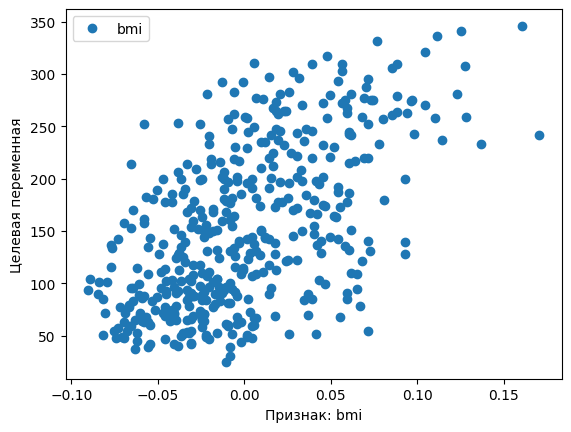

In [62]:
# plt.plot(X_d, y_d, 'o')
# plt.xlabel("Признак")
# plt.ylabel("Целевая переменная")
# plt.legend()
# plt.show()
plt.plot(X_d.iloc[:, 2], y_d, 'o', label=X_d.columns[2])  # 3rd признак
plt.xlabel("Признак: " + X_d.columns[2])
plt.ylabel("Целевая переменная")
plt.legend()
plt.show()

#### Датасет **linnerud**

In [63]:
linnerud_data = load_linnerud(as_frame=True)
linnerud = load_linnerud()

X_l = linnerud_data.data #признаки
y_l = linnerud_data.target #цел. переменная

print("Признаки (X):")
print(X_l.head())

print("\nЦелевая переменная (y):")
print(y_l.head())

Признаки (X):
   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0

Целевая переменная (y):
   Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0


In [64]:
print("\nОписание набора данных Linnerud:\n", linnerud_data.DESCR)


Описание набора данных Linnerud:
 .. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

:Number of Instances: 20
:Number of Attributes: 3
:Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. dropdown:: References

   * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
     Editions Technic.



In [65]:
print(f'Keys of diabets:\n{linnerud.keys()}')
print("==="*10)
print("Форма массива data для набора linnerud: \n{}".format(linnerud.data.shape))
print("==="*10)
print(f'Имена признаков:\n{linnerud.feature_names}')

Keys of diabets:
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])
Форма массива data для набора linnerud: 
(20, 3)
Имена признаков:
['Chins', 'Situps', 'Jumps']


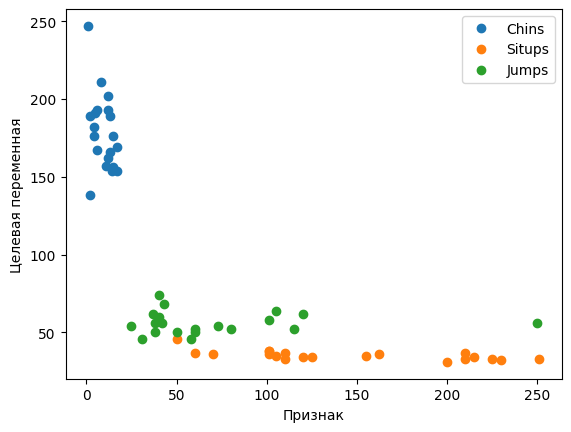

In [66]:
plt.plot(X_l, y_l, 'o', label = X_l.columns[::])
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.legend()
plt.show()

### Построение модели регресии

#### KNeighborsRegressor

стандартизация данных способствует
1. более быстрой и стабильной сходимости алгоритма (Ridge и Lasso);
2. приводит все признаки к единому масштабу, что улучшает точность предсказаний
3. устранению влияния масштаба признаков

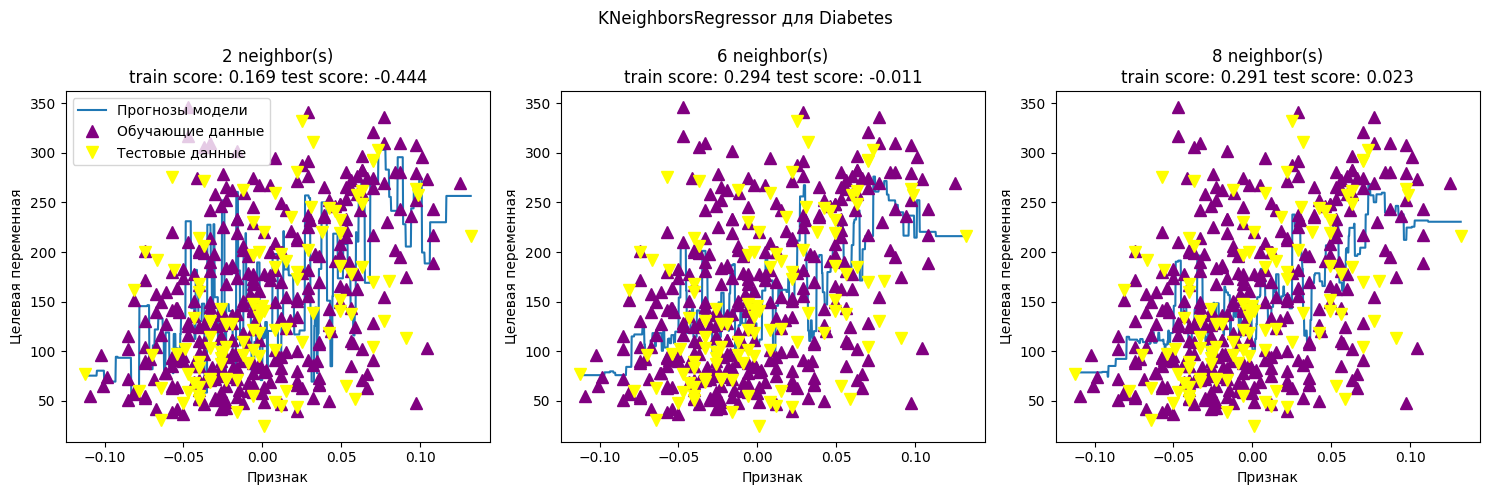

Прогнозы для тестового набора: 
[204.125 178.625 131.625 212.25  260.5   258.125 222.875 101.625 143.25
  78.75  204.375 103.25  172.125 224.375 143.25  131.75  143.25  102.25
 183.25  165.75  204.375 172.125 123.375 257.125 172.125 103.25  123.375
 118.625 118.625 143.25  139.    156.625 101.625 196.375 196.375 159.375
 204.125 159.375 143.25  224.625 155.375 230.5   246.625 112.375 145.875
 131.5   103.25  172.125 168.75  204.125 111.    103.25  131.625 101.625
 103.25  131.625 159.375 192.     92.375 204.125 103.25  131.625 204.375
 182.75  172.125 196.375 143.25  143.25  123.375 196.375 159.375 103.25
 110.5   178.625 169.25  204.125 111.75  190.25  103.25  118.625 204.125
 156.625 196.375 131.5   131.75  159.375 131.75  119.25  111.75  156.625
 169.25  118.375 227.75  143.25  131.625 224.375 118.625 131.625 109.25
 119.25  204.375 156.625 190.25  126.    139.    101.625 182.75  123.375
 139.625 126.    224.375]

Правильность на тестовом наборе: 0.023

Правильность на обучающем наб

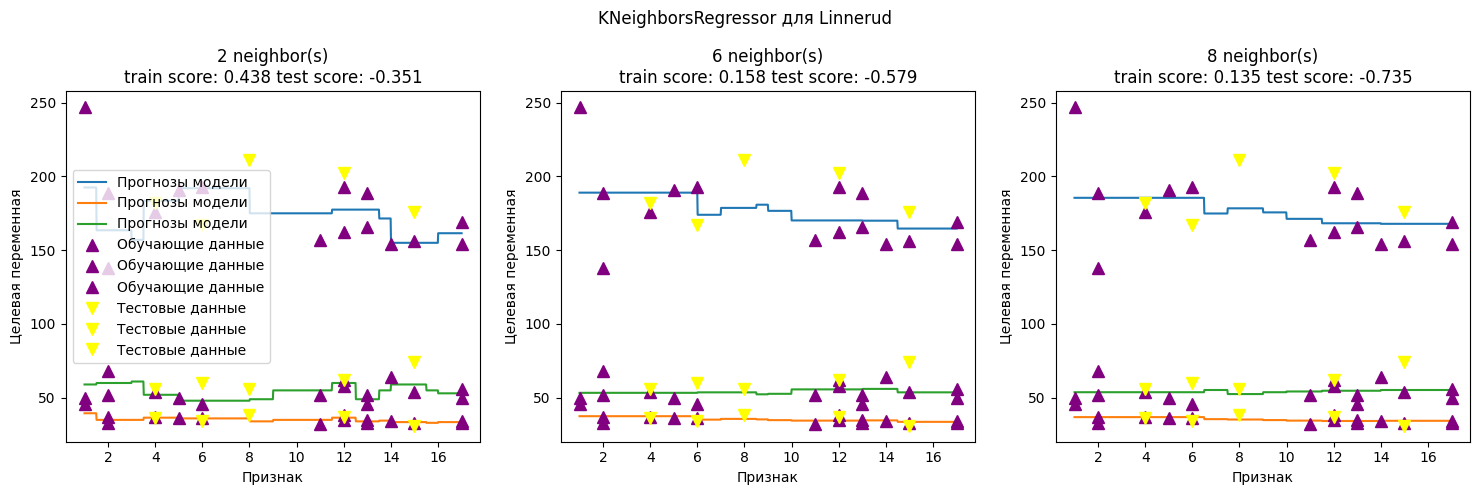

Прогнозы для тестового набора: 
[[185.5    36.875  53.75 ]
 [167.875  34.375  55.25 ]
 [168.25   34.25   54.75 ]
 [178.375  35.25   52.5  ]
 [185.5    36.875  53.75 ]]

Правильность на тестовом наборе: -0.735

Правильность на обучающем наборе: 0.135


In [118]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_diabetes, load_linnerud

def plot_knn_regressor(X, y, dataset_name):
    """
    Функция для построения графиков прогнозов KNeighborsRegressor для разных значений n_neighbors.

    Parameters:
    X (array-like): Признаки
    y (array-like): Целевая переменная
    dataset_name (str): Название датасета
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # создаем 1000 точек данных, равномерно распределенных между минимальным и максимальным значением признаков
    line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

    #значения n_neighbors: 2, 6, и 8
    for n_neighbors, ax in zip([2, 6, 8], axes):
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)

        ax.plot(line, reg.predict(line), label="Прогнозы модели")

        ax.plot(X_train, y_train, '^', c="purple", markersize=8, label="Обучающие данные")

        ax.plot(X_test, y_test, 'v', c="yellow", markersize=8, label="Тестовые данные")

        ax.set_title(
            "{} neighbor(s)\ntrain score: {:.3f} test score: {:.3f}".format(
                n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
            )
        )
        ax.set_xlabel("Признак")
        ax.set_ylabel("Целевая переменная")

    axes[0].legend(loc="best")
    plt.suptitle(f"KNeighborsRegressor для {dataset_name}")
    plt.tight_layout()
    plt.show()
    print(f"Прогнозы для тестового набора: \n{reg.predict(X_test)}")
    print(f"\nПравильность на тестовом наборе: {reg.score(X_test, y_test):.3f}")
    print(f"\nПравильность на обучающем наборе: {reg.score(X_train, y_train):.3f}")

diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data[:, 3:4], diabetes.target
plot_knn_regressor(X_diabetes, y_diabetes, "Diabetes")

linnerud = load_linnerud()
X_linnerud, y_linnerud = linnerud.data[:, 0:1], linnerud.target
plot_knn_regressor(X_linnerud, y_linnerud, "Linnerud")


#### LinearRegression

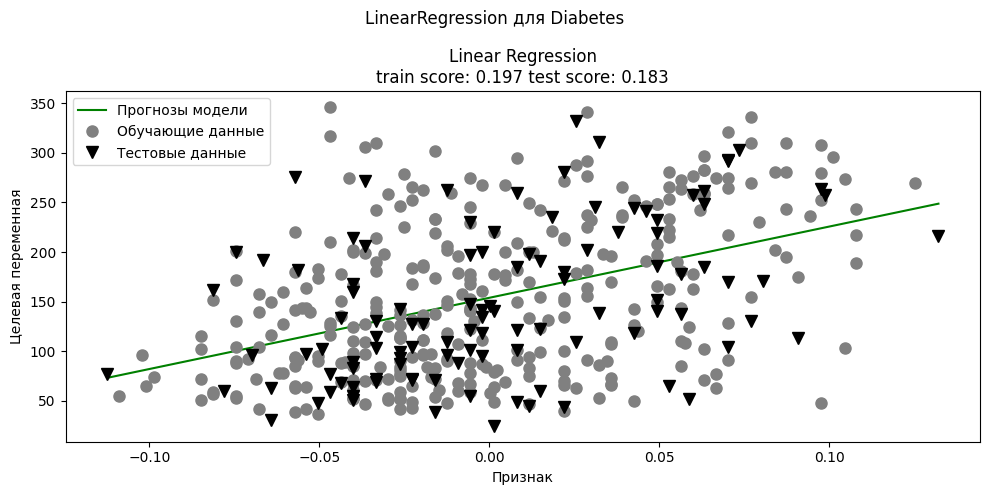

Прогнозы для тестового набора: 
[189.39902926 184.45781285 152.33990621 223.9875441  206.69328668
 211.63450308 174.57538004 154.81051442 149.86929801  73.28044372
 204.22267847 125.16321598 159.75173082 199.28146207 149.86929801
 144.9280816  149.86929801  97.98652575 195.99555316 186.92842105
 204.22267847 159.75173082 137.51625699 209.16389488 159.75173082
 125.16321598 137.51625699 135.04564879 135.04564879 149.86929801
 122.69260778 169.63416363 153.99521371 130.10443239 130.10443239
 142.4574734  189.39902926 164.69294723 149.86929801 224.8028448
 167.16355543 248.69362613 219.04632769 103.74304286 118.56669208
 162.22233902 125.16321598 159.75173082 181.17190394 189.39902926
 112.81017497 125.16321598 139.9868652  154.81051442 125.16321598
 152.33990621 164.69294723 176.23068753  95.51591754 189.39902926
 125.16321598 152.33990621 204.22267847 177.04598824 159.75173082
 130.10443239 172.10477184 172.10477184 137.51625699 130.10443239
 164.69294723 125.16321598 115.28078317 184.4

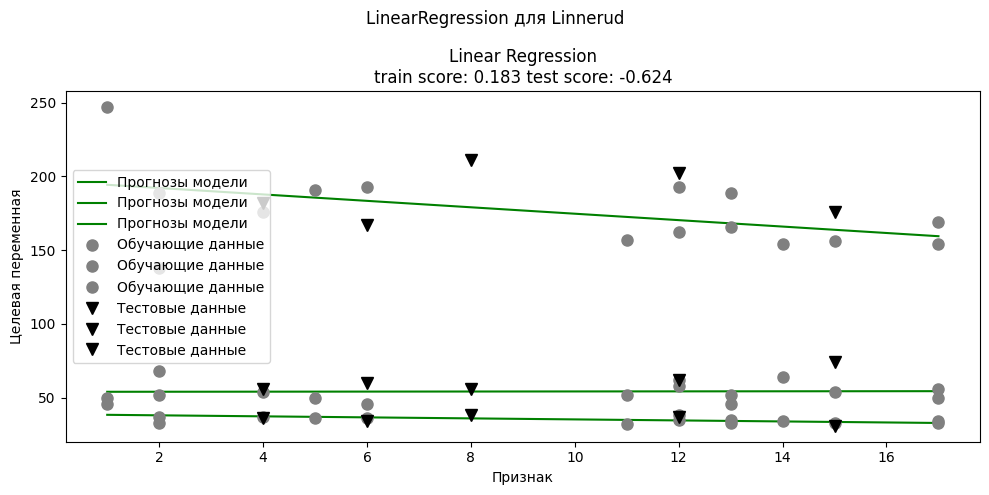

Прогнозы для тестового набора: 
[[183.44217082  36.70937129  54.1737841 ]
 [163.83674377  33.60260973  54.40599051]
 [170.37188612  34.63819692  54.32858837]
 [179.08540925  36.01897983  54.22538553]
 [187.79893238  37.39976275  54.12218268]]

Правильность на тестовом наборе: -0.624

Правильность на обучающем наборе: 0.183


In [119]:
def plot_linear_regression(X, y, dataset_name):
    """
    Функция для построения графиков прогнозов LinearRegression для одного значения гиперпараметра.

    Parameters:
    X (array-like): Признаки
    y (array-like): Целевая переменная
    dataset_name (str): Название датасета
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    ax.plot(line, model.predict(line), label="Прогнозы модели", color="green")
    ax.plot(X_train, y_train, 'o', c="gray", markersize=8, label="Обучающие данные")

    ax.plot(X_test, y_test, 'v', c="black", markersize=8, label="Тестовые данные")

    ax.set_title(
        "Linear Regression\ntrain score: {:.3f} test score: {:.3f}".format(
            model.score(X_train, y_train), model.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")

    ax.legend(loc="best")
    plt.suptitle(f"LinearRegression для {dataset_name}")
    plt.tight_layout()
    plt.show()
    print(f"Прогнозы для тестового набора: \n{model.predict(X_test)}")
    print(f"\nПравильность на тестовом наборе: {model.score(X_test, y_test):.3f}")
    print(f"\nПравильность на обучающем наборе: {model.score(X_train, y_train):.3f}")

diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data[:, 3:4], diabetes.target
plot_linear_regression(X_diabetes, y_diabetes, "Diabetes")

linnerud = load_linnerud()
X_linnerud, y_linnerud = linnerud.data[:, 0:1], linnerud.target
plot_linear_regression(X_linnerud, y_linnerud, "Linnerud")


#### Ridge

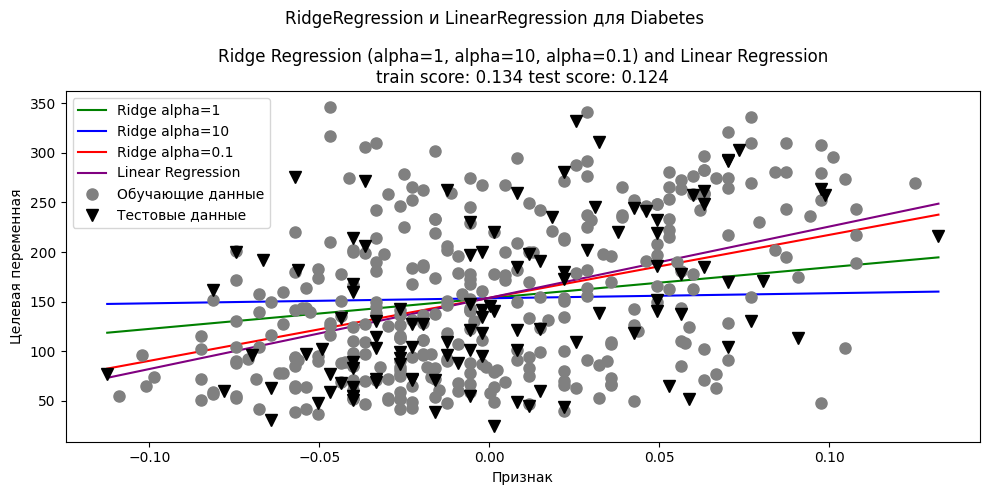

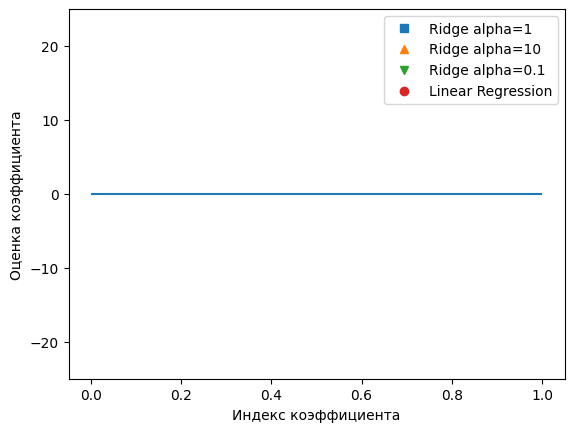

Правильность на тестовом наборе для Ridge alpha=1: 0.124
Правильность на тестовом наборе для Ridge alpha=10: 0.022
Правильность на тестовом наборе для Ridge alpha=0.1: 0.181
Правильность на тестовом наборе для линейной регрессии: 0.183


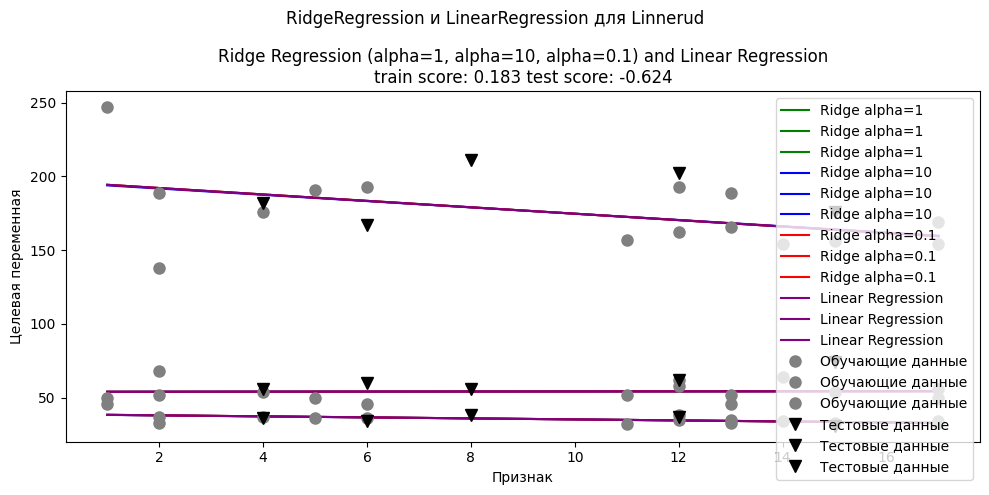

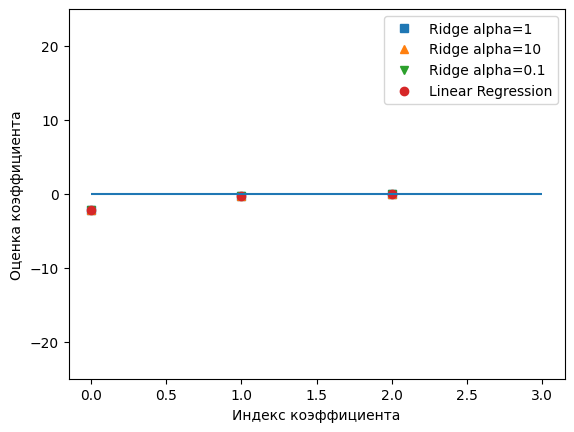

Правильность на тестовом наборе для Ridge alpha=1: -0.624
Правильность на тестовом наборе для Ridge alpha=10: -0.619
Правильность на тестовом наборе для Ridge alpha=0.1: -0.624
Правильность на тестовом наборе для линейной регрессии: -0.624


In [120]:
def plot_ridge_regression(X, y, dataset_name):
    """
    Функция для построения графиков прогнозов RidgeRegression для разных значений alpha.

    Parameters:
    X (array-like): Признаки
    y (array-like): Целевая переменная
    dataset_name (str): Название датасета
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

    # Модели с разными значениями alpha
    ridge = Ridge(alpha=1)
    ridge.fit(X_train, y_train)

    ridge10 = Ridge(alpha=10)
    ridge10.fit(X_train, y_train)

    ridge01 = Ridge(alpha=0.1)
    ridge01.fit(X_train, y_train)

    # Линейная регрессия для сравнения
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    ax.plot(line, ridge.predict(line), label="Ridge alpha=1", color="green")
    ax.plot(line, ridge10.predict(line), label="Ridge alpha=10", color="blue")
    ax.plot(line, ridge01.predict(line), label="Ridge alpha=0.1", color="red")
    ax.plot(line, lr.predict(line), label="Linear Regression", color="purple")

    ax.plot(X_train, y_train, 'o', c="gray", markersize=8, label="Обучающие данные")
    ax.plot(X_test, y_test, 'v', c="black", markersize=8, label="Тестовые данные")

    ax.set_title(
        "Ridge Regression (alpha=1, alpha=10, alpha=0.1) and Linear Regression\n"
        "train score: {:.3f} test score: {:.3f}".format(
            ridge.score(X_train, y_train), ridge.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")

    ax.legend(loc="best")
    plt.suptitle(f"RidgeRegression и LinearRegression для {dataset_name}")
    plt.tight_layout()
    plt.show()

    plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
    plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
    plt.plot(lr.coef_, 'o', label="Linear Regression")
    plt.xlabel("Индекс коэффициента")
    plt.ylabel("Оценка коэффициента")
    plt.hlines(0, 0, len(lr.coef_))
    plt.ylim(-25, 25)
    plt.legend()
    plt.show()

    print(f"Правильность на тестовом наборе для Ridge alpha=1: {ridge.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для Ridge alpha=10: {ridge10.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для Ridge alpha=0.1: {ridge01.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для линейной регрессии: {lr.score(X_test, y_test):.3f}")

diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data[:, 3:4], diabetes.target
plot_ridge_regression(X_diabetes, y_diabetes, "Diabetes")

linnerud = load_linnerud()
X_linnerud, y_linnerud = linnerud.data[:, 0:1], linnerud.target
plot_ridge_regression(X_linnerud, y_linnerud, "Linnerud")

#### Lasso

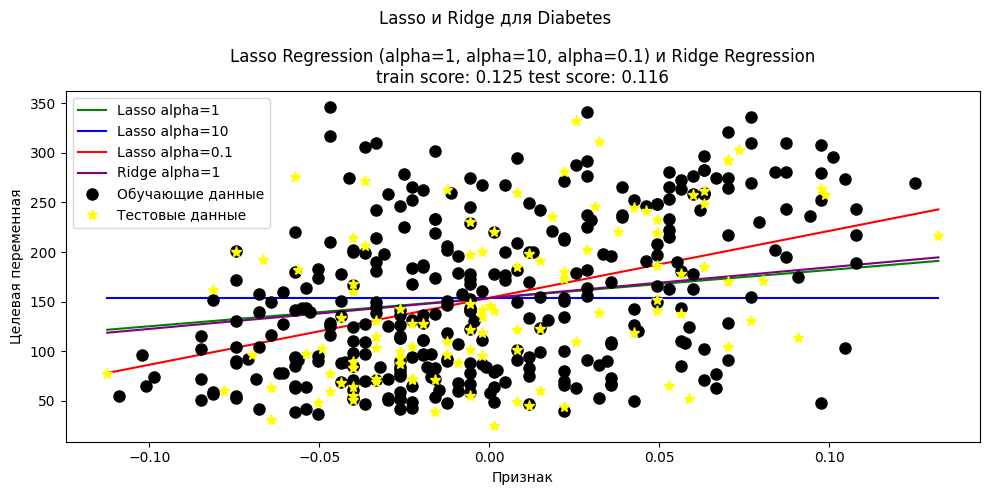

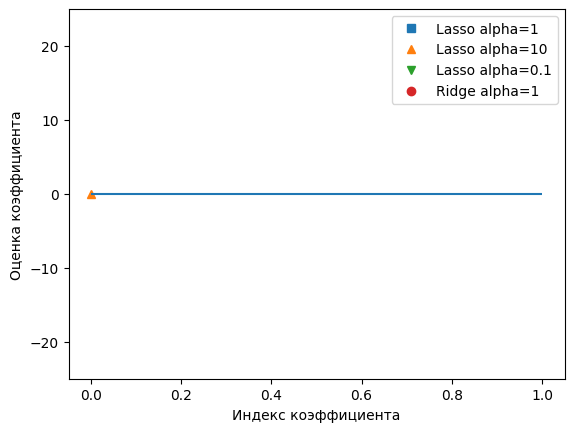

Правильность на тестовом наборе для Lasso alpha=1: 0.116
Правильность на тестовом наборе для Lasso alpha=10: -0.004
Правильность на тестовом наборе для Lasso alpha=0.1: 0.182
Правильность на тестовом наборе для Ridge alpha=1: 0.124


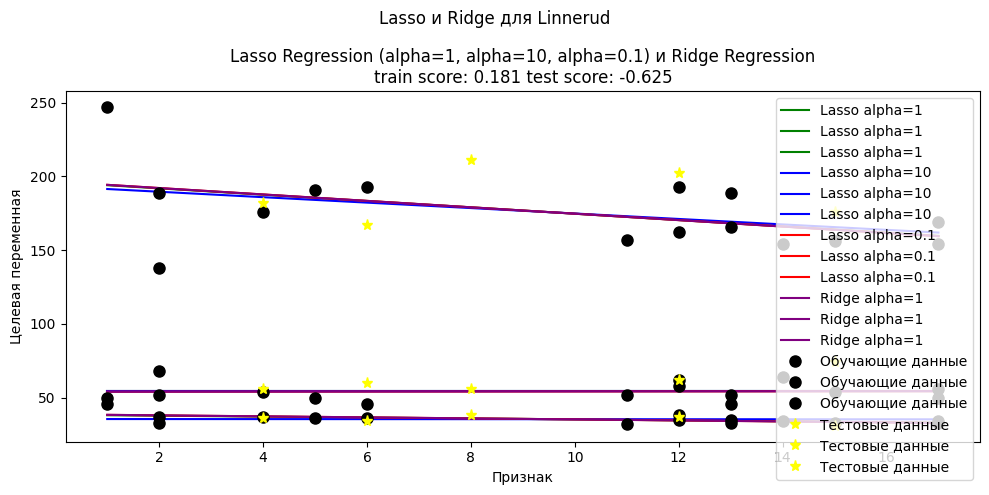

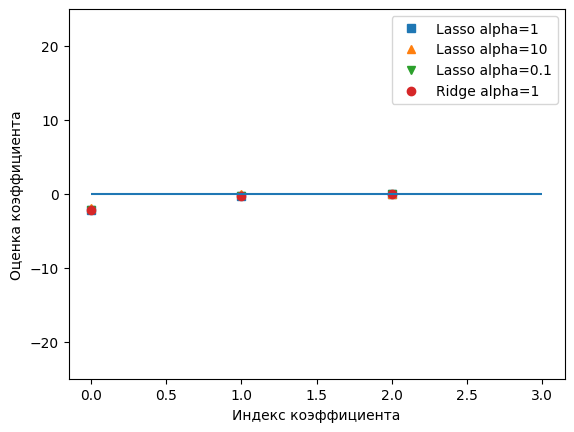

Правильность на тестовом наборе для Lasso alpha=1: -0.625
Правильность на тестовом наборе для Lasso alpha=10: -0.658
Правильность на тестовом наборе для Lasso alpha=0.1: -0.624
Правильность на тестовом наборе для Ridge alpha=1: -0.624


In [122]:
def plot_lasso_regression(X, y, dataset_name):
    """
    Функция для построения графиков прогнозов LassoRegression для разных значений alpha.

    Parameters:
    X (array-like): Признаки
    y (array-like): Целевая переменная
    dataset_name (str): Название датасета
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

    # Модели с разными значениями alpha
    lasso = Lasso(alpha=1)
    lasso.fit(X_train, y_train)

    lasso10 = Lasso(alpha=10)
    lasso10.fit(X_train, y_train)

    lasso01 = Lasso(alpha=0.1)
    lasso01.fit(X_train, y_train)

    # Модели гребневой регрессии для сравнения
    ridge = Ridge(alpha=1)
    ridge.fit(X_train, y_train)

    ax.plot(line, lasso.predict(line), label="Lasso alpha=1", color="green")
    ax.plot(line, lasso10.predict(line), label="Lasso alpha=10", color="blue")
    ax.plot(line, lasso01.predict(line), label="Lasso alpha=0.1", color="red")
    ax.plot(line, ridge.predict(line), label="Ridge alpha=1", color="purple")

    ax.plot(X_train, y_train, 'o', c="black", markersize=8, label="Обучающие данные")
    ax.plot(X_test, y_test, '*', c="yellow", markersize=8, label="Тестовые данные")

    ax.set_title(
        "Lasso Regression (alpha=1, alpha=10, alpha=0.1) и Ridge Regression\n"
        "train score: {:.3f} test score: {:.3f}".format(
            lasso.score(X_train, y_train), lasso.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")

    ax.legend(loc="best")
    plt.suptitle(f"Lasso и Ridge для {dataset_name}")
    plt.tight_layout()
    plt.show()

    plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
    plt.plot(lasso10.coef_, '^', label="Lasso alpha=10")
    plt.plot(lasso01.coef_, 'v', label="Lasso alpha=0.1")
    plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
    plt.xlabel("Индекс коэффициента")
    plt.ylabel("Оценка коэффициента")
    plt.hlines(0, 0, len(lasso.coef_))
    plt.ylim(-25, 25)
    plt.legend()
    plt.show()

    print(f"Правильность на тестовом наборе для Lasso alpha=1: {lasso.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для Lasso alpha=10: {lasso10.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для Lasso alpha=0.1: {lasso01.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для Ridge alpha=1: {ridge.score(X_test, y_test):.3f}")

diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data[:, 3:4], diabetes.target
plot_lasso_regression(X_diabetes, y_diabetes, "Diabetes")

linnerud = load_linnerud()
X_linnerud, y_linnerud = linnerud.data[:, 0:1], linnerud.target
plot_lasso_regression(X_linnerud, y_linnerud, "Linnerud")

#### LogisticRegression

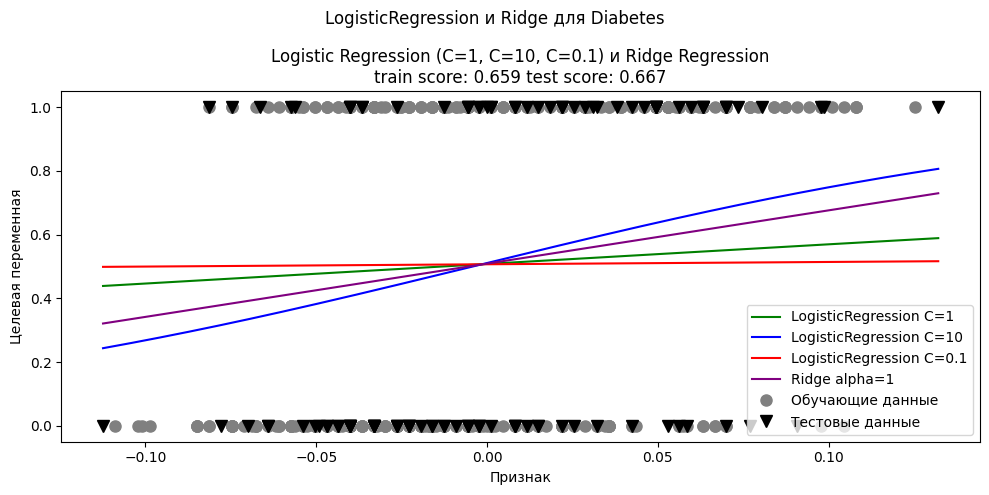

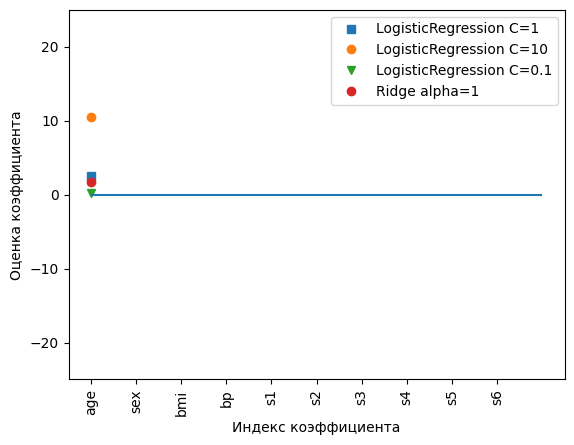

Правильность на тестовом наборе для LogisticRegression C=1: 0.667
Правильность на тестовом наборе для LogisticRegression C=10: 0.685
Правильность на тестовом наборе для LogisticRegression C=0.1: 0.486
Правильность на тестовом наборе для Ridge alpha=1: 0.081


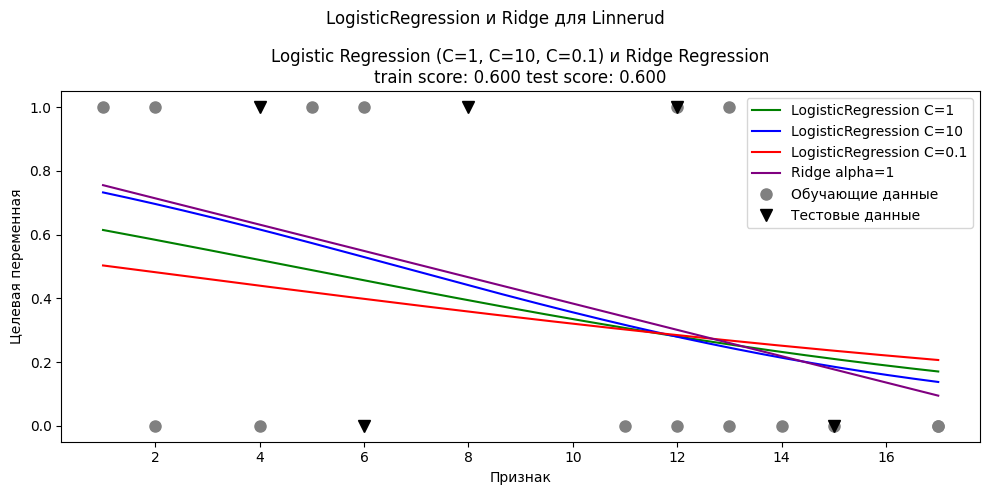

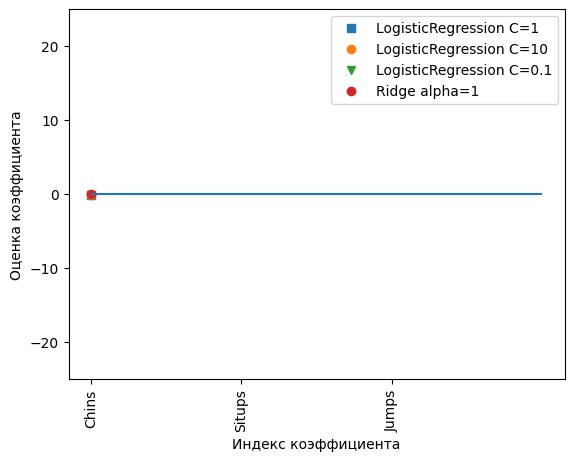

Правильность на тестовом наборе для LogisticRegression C=1: 0.600
Правильность на тестовом наборе для LogisticRegression C=10: 0.400
Правильность на тестовом наборе для LogisticRegression C=0.1: 0.400
Правильность на тестовом наборе для Ridge alpha=1: -0.035


In [129]:
def plot_logistic_regression(X, y, dataset, dataset_name):
    """
    Функция для построения графиков прогнозов LogisticRegression для разных значений C.

    Parameters:
    X (array-like): Признаки
    y (array-like): Целевая переменная
    dataset (object): Объект датасета
    dataset_name (str): Название датасета
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

    # Модели с разными значениями C
    logreg = LogisticRegression(C=1, solver='liblinear')
    logreg.fit(X_train, y_train)

    logreg10 = LogisticRegression(C=10, solver='liblinear')
    logreg10.fit(X_train, y_train)

    logreg01 = LogisticRegression(C=0.1, solver='liblinear')
    logreg01.fit(X_train, y_train)

    # Модели гребневой регрессии для сравнения
    ridge = Ridge(alpha=1)
    ridge.fit(X_train, y_train)

    ax.plot(line, logreg.predict_proba(line)[:, 1], label="LogisticRegression C=1", color="green")
    ax.plot(line, logreg10.predict_proba(line)[:, 1], label="LogisticRegression C=10", color="blue")
    ax.plot(line, logreg01.predict_proba(line)[:, 1], label="LogisticRegression C=0.1", color="red")
    ax.plot(line, ridge.predict(line), label="Ridge alpha=1", color="purple")

    ax.plot(X_train, y_train, 'o', c="gray", markersize=8, label="Обучающие данные")
    ax.plot(X_test, y_test, 'v', c="black", markersize=8, label="Тестовые данные")

    ax.set_title(
        "Logistic Regression (C=1, C=10, C=0.1) и Ridge Regression\n"
        "train score: {:.3f} test score: {:.3f}".format(
            logreg.score(X_train, y_train), logreg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")

    ax.legend(loc="best")
    plt.suptitle(f"LogisticRegression и Ridge для {dataset_name}")
    plt.tight_layout()
    plt.show()

    plt.plot(logreg.coef_.flatten(), 's', label="LogisticRegression C=1")
    plt.plot(logreg10.coef_.flatten(), 'o', label="LogisticRegression C=10")
    plt.plot(logreg01.coef_.flatten(), 'v', label="LogisticRegression C=0.1")
    plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
    plt.xlabel("Индекс коэффициента")
    plt.ylabel("Оценка коэффициента")

    # Теперь используем правильный объект для данных и feature_names
    plt.xticks(range(dataset.data.shape[1]), dataset.feature_names, rotation=90)
    plt.hlines(0, 0, dataset.data.shape[1])
    plt.ylim(-25, 25)
    plt.legend()
    plt.show()

    print(f"Правильность на тестовом наборе для LogisticRegression C=1: {logreg.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для LogisticRegression C=10: {logreg10.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для LogisticRegression C=0.1: {logreg01.score(X_test, y_test):.3f}")
    print(f"Правильность на тестовом наборе для Ridge alpha=1: {ridge.score(X_test, y_test):.3f}")

# классификация: преобразование целевую переменную в бинарную
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data[:, 3:4], (diabetes.target > np.median(diabetes.target)).astype(int)  # Преобразование в задачу классификации
plot_logistic_regression(X_diabetes, y_diabetes, diabetes, "Diabetes")

linnerud = load_linnerud()
X_linnerud, y_linnerud = linnerud.data[:, 0:1], (linnerud.target[:, 0] > np.median(linnerud.target[:, 0])).astype(int)  # Преобразование в задачу классификации
plot_logistic_regression(X_linnerud, y_linnerud, linnerud, "Linnerud")

### Выводы

Для анализа результатов на датасетах *diabetes* и *linnerud* можно провести сравнительный анализ моделей:

#### 1. **KNN регрессор**:
   - **Diabetes**: очень низкая точность на тестовом наборе (0.023), что может указывать на плохую генерализацию модели для данного датасета. Возможно связано с характеристиками данных или с плохим выбором гиперпараметров.
   - **Linnerud**: модель также не смогла предсказать значения с достаточной точностью (правильность -0.735), что указывает на возможное переобучение или плохую ее спецификацию.

#### 2. **Линейная регрессия**:
   - **Diabetes**: низкая точность на тестовом наборе (0.183) и обучающем наборе (0.197). возможно, из-за нелинейности данных или недостаточного качества данных не может предсказать целевые значения.
   - **Linnerud**: аналогичная ситуация на *linnerud* с результатами -0.624 на тестовом наборе. может указывать на проблему с качеством модели для данных, не поддерживающих линейные зависимости.

#### 3. **Ridge регрессия**:
   - **Diabetes**: для разных значений гиперпараметра alpha результаты варьируются (от 0.022 до 0.181), в целом точность остается низкой по сравнению с другими моделями, следовательно, Ridge не подходит для этой задачи.
   - **Linnerud**: результаты варьируются от -0.624 до -0.619, что указывает на плохую способность модели к обобщению.

#### 4. **Lasso регрессия**:
   - **Diabetes**: для разных значений alpha точность снова остается достаточно низкой (аналогично результатам Ridge).
   - **Linnerud**: модель Lasso демонстрирует схожие результаты с Ridge с негативными значениями правильности на тестовом наборе, что подтверждает, что данная модель не решает задачи классификации или регрессии для этого набора данных.

#### 5. **Logistic Regression**:
   - **Diabetes**: модели Logistic Regression с C=1 (0.667) и C=10 (0.685) показывают гораздо лучшие результаты по сравнению с другими. Можно сказать, что для задачи классификации Logistic Regression с такими гиперпараметрами хорошо справляется с задачей.
   - **Linnerud**: модели показывают довольно низкие значения правильности (от 0.400 до 0.600). Возможно связано с особенностями данных, где нелинейные зависимости влияют на эффективность модели.

#### **Выводы**:
- Для *diabetes* Logistic Regression является наиболее подходящей моделью, с хорошими результатами для C=1 и C=10, что подтверждает ее эффективность для бинарной классификации.
- Для *linnerud* модели показывают слабые результаты в задаче классификации или регрессии. Стоит рассмотреть другие подходы или лучше настроить гиперпараметры моделей.
- Модели, такие как Ridge, Lasso и линейная регрессия, не дали хороших результатов на обоих датасетах и вероятно для этих данных требуются более сложные или специально настроенные модели.